![kc_logo](images/king_county_logo.png)

# King County Property Analysis

**Author:** Scott Graham

# Overview

The goal of this analysis is to view data from King County of property sale prices in 2014 and 2015 and provide insight to prospective buyers and sellers what property features will provide the best sale price.

# Hypothesis

**Ho (Null Hypothesis) -** There is no key indicators that any property features will increase sales price

**Ha (Alternative Hypothesis) -** There are indicators that certain features of a property will provide a higher chance of increased sales price

# Data Understanding

Importing the appropriate libraries and data to Python:

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy import stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import random
from math import sqrt
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv ('data/kc_house_data.csv')

In [3]:
# View the data
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info

<bound method DataFrame.info of                id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  

In [5]:
#Remove columns that I deem unnessary for this analysis
data.drop(columns = ['view', 'date', 'sqft_above','sqft_basement','waterfront', 'zipcode','lat',
                         'long','sqft_living15','sqft_lot15', 'yr_renovated'],inplace = True)
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1987


In [6]:
# Replace all nan values with 0
data = data.replace(np.nan, 0, regex=True)
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,3,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,3,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,3,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,3,8,2004


In [7]:
#obtain stats details
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
count,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597
mean,"4,580,474,287.77","540,296.57",3.37,2.12,"2,080.32","15,099.41",1.49,3.41,7.66,"1,971.00"
std,"2,876,735,715.75","367,368.14",0.93,0.77,918.11,"41,412.64",0.54,0.65,1.17,29.38
min,1000102,78000,1,0.50,370,520,1,1,3,1900
25%,2123049175,322000,3,1.75,1430,5040,1,3,7,1951
50%,3904930410,450000,3,2.25,1910,7618,1.50,3,7,1975
75%,7308900490,645000,4,2.50,2550,10685,2,4,8,1997
max,9900000190,7700000,33,8,13540,1651359,3.50,5,13,2015


What does "id" actually represent? What do duplicates mean or "id"? Do I need to remove these duplicates?

In [8]:
data.duplicated('id').value_counts()

False    21420
True       177
dtype: int64

In [9]:
data.sort_values('id', ascending=False)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
15937,9900000190,268950,3,1,1320,8100,1,3,6,1943
20963,9895000040,399900,2,1.75,1410,1005,1.50,3,9,2011
7614,9842300540,339000,3,1,1100,4128,1,4,7,1942
3257,9842300485,380000,2,1,1040,7372,1,5,7,1939
16723,9842300095,365000,5,2,1600,4168,1.50,3,7,1927
...,...,...,...,...,...,...,...,...,...,...
8800,2800031,235000,3,1,1430,7599,1.50,4,6,1930
8404,1200021,400000,3,1,1460,43000,1,3,7,1952
6729,1200019,647500,4,1.75,2060,26036,1,4,8,1947
2495,1000102,300000,6,3,2400,9373,2,3,7,1991


In [10]:
# Viewing id values grouped to check if the id is a duplicate or house sold multiple times
pd.concat(g for _, g in data.groupby("id") if len(g) > 1).head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
2494,1000102,280000,6,3,2400,9373,2,3,7,1991
2495,1000102,300000,6,3,2400,9373,2,3,7,1991
16800,7200179,150000,2,1,840,12750,1,3,6,1925
16801,7200179,175000,2,1,840,12750,1,3,6,1925
11421,109200390,245000,3,1.75,1480,3900,1,4,7,1980
11422,109200390,250000,3,1.75,1480,3900,1,4,7,1980
12405,123039336,148000,1,1,620,8261,1,3,5,1939
12406,123039336,244900,1,1,620,8261,1,3,5,1939
7785,251300110,225000,3,2.25,2510,12013,2,3,8,1988
7786,251300110,358000,3,2.25,2510,12013,2,3,8,1988


From above I can see that the "id" represents the property id and the duplicates are the sale of the same house at muliptle different times, so I will remove this as I dont see it as a necessary column anymore.

In [11]:
data.drop(['id'], axis=1, inplace = True)

In [12]:
data.nunique()

price          3622
bedrooms         12
bathrooms        29
sqft_living    1034
sqft_lot       9776
floors            6
condition         5
grade            11
yr_built        116
dtype: int64

In [13]:
# Review the correlated value estimated
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
price,1,0.31,0.53,0.70,0.09,0.26,0.04,0.67,0.05
bedrooms,0.31,1,0.51,0.58,0.03,0.18,0.03,0.36,0.16
bathrooms,0.53,0.51,1,0.76,0.09,0.50,-0.13,0.67,0.51
sqft_living,0.70,0.58,0.76,1,0.17,0.35,-0.06,0.76,0.32
sqft_lot,0.09,0.03,0.09,0.17,1,-0.00,-0.01,0.11,0.05
floors,0.26,0.18,0.50,0.35,-0.00,1,-0.26,0.46,0.49
condition,0.04,0.03,-0.13,-0.06,-0.01,-0.26,1,-0.15,-0.36
grade,0.67,0.36,0.67,0.76,0.11,0.46,-0.15,1,0.45
yr_built,0.05,0.16,0.51,0.32,0.05,0.49,-0.36,0.45,1


In [14]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
0,221900,3,1,1180,5650,1,3,7,1955
1,538000,3,2.25,2570,7242,2,3,7,1951
2,180000,2,1,770,10000,1,3,6,1933
3,604000,4,3,1960,5000,1,5,7,1965
4,510000,3,2,1680,8080,1,3,8,1987


# Exploratory Data Analysis and Visualisations

For all the variables, we will check their distribution by creating a Histogram with KDE

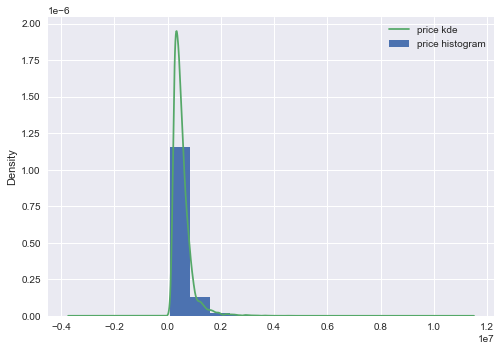

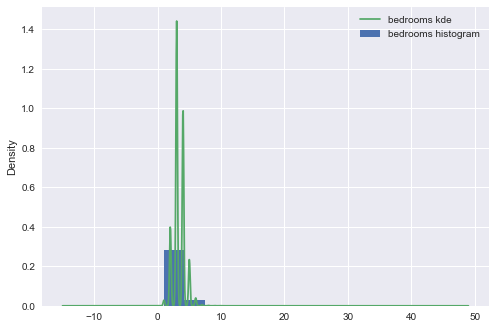

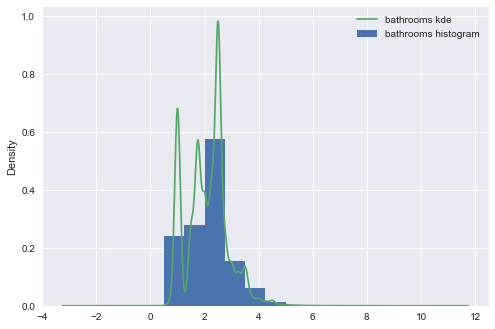

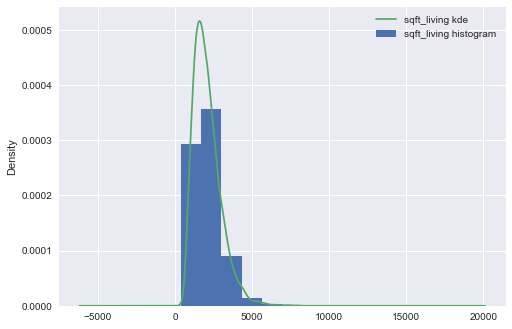

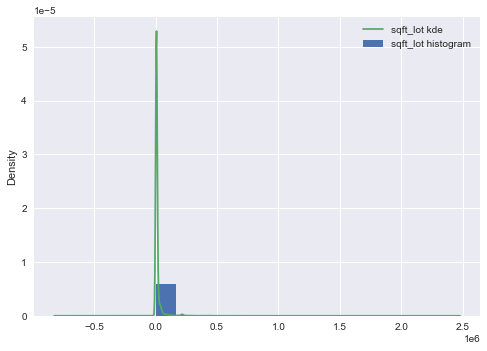

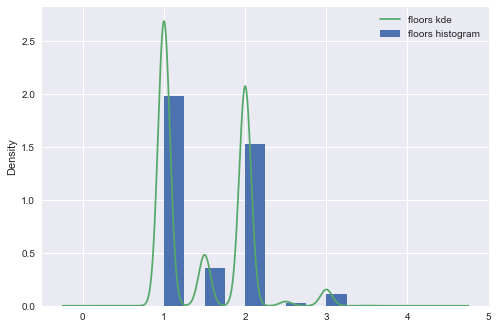

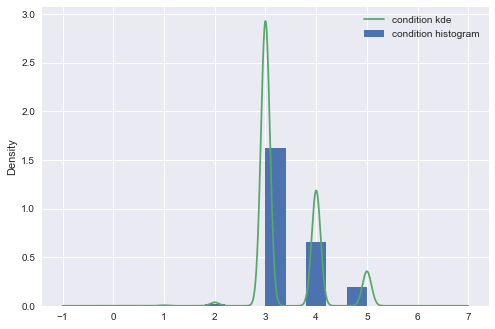

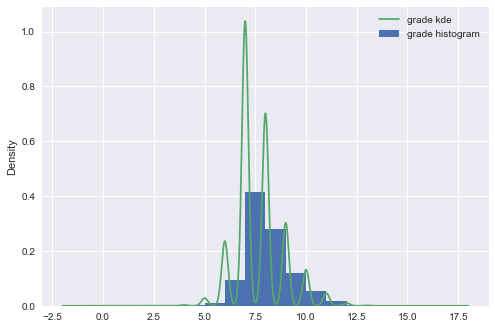

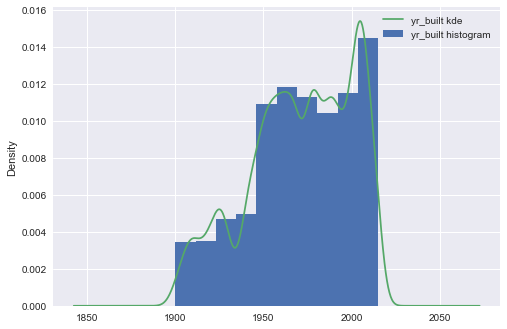

In [15]:
for column in data:
    data[column].plot.hist(density=True, label=column+' histogram')
    data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

Now we want to visualise the relationship between the predictors and the target (price) using scatter plots

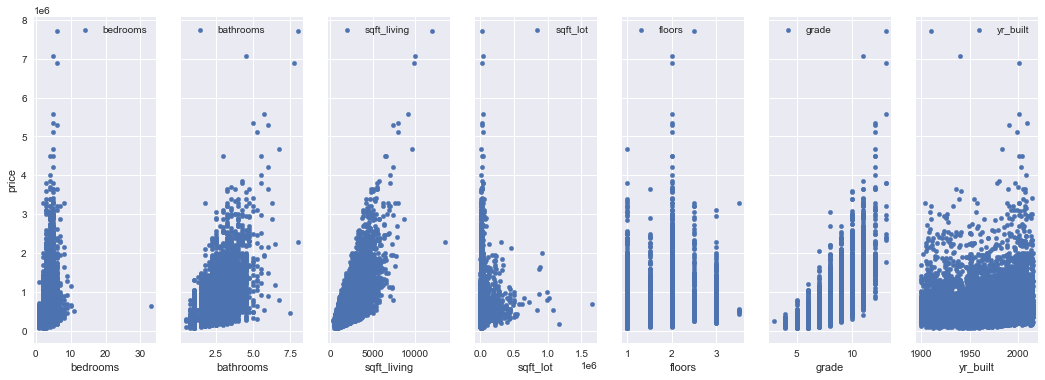

In [16]:
fig, axs = plt.subplots(1, 7, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'yr_built']):
    data.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

Can clearly see that there is an issue with a house with 33 bedrooms, we will remove this.

In [17]:
data = data.drop(data[data.bedrooms == 33].index)

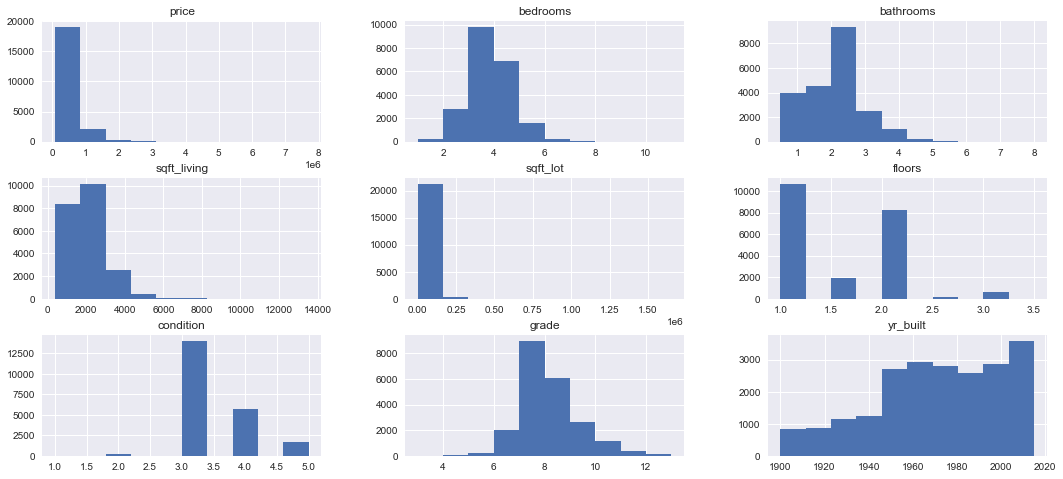

In [18]:
fig = plt.figure(figsize = (18,8))
ax = fig.gca()
data.hist(ax = ax);

# Data Cleaning

Further remove outliers from the rest of the data using z-score.

In [19]:
# Remove outliers using Z-Score
from scipy import stats
import numpy as np
df = data.iloc[:,[0,1,2,3,4,5,6,7,8]]
z = np.abs(stats.zscore(df))

threshold = 3

df.shape

(21596, 9)

In [20]:
data = df[(z < 3).all(axis=1)]
data.shape

(20557, 9)

In [21]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
0,221900,3,1,1180,5650,1,3,7,1955
1,538000,3,2.25,2570,7242,2,3,7,1951
2,180000,2,1,770,10000,1,3,6,1933
3,604000,4,3,1960,5000,1,5,7,1965
4,510000,3,2,1680,8080,1,3,8,1987


We now want to revist the scatter plots, Histogram and KDE to see how the data looks after removing outliers

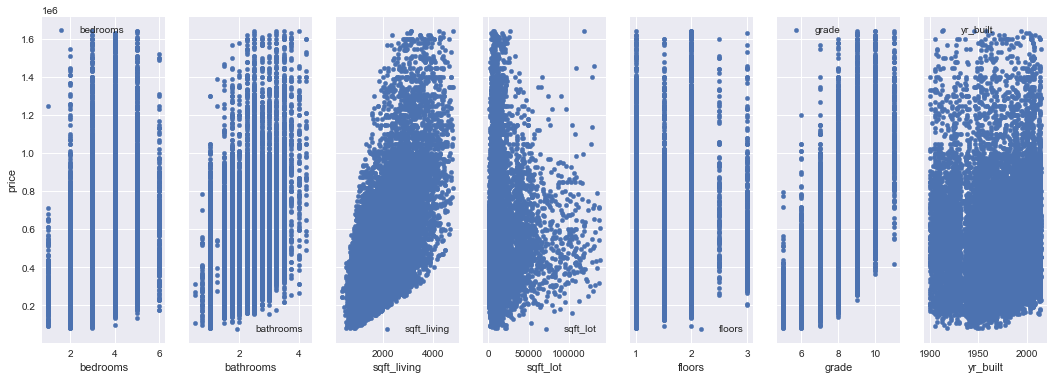

In [22]:
# Recheck the scatter plot visualisation after the removal of outliers
fig, axs = plt.subplots(1, 7, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'yr_built']):
    data.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

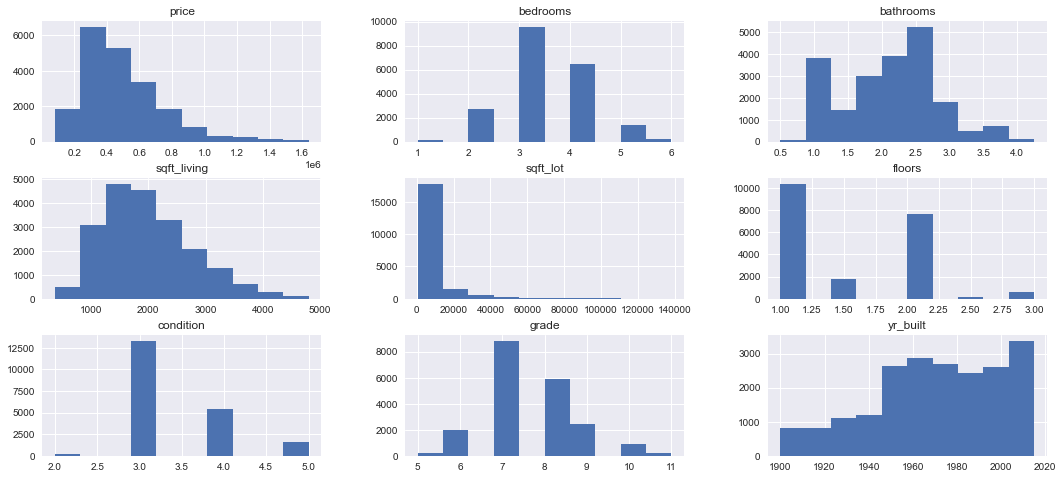

In [23]:
# Review the histograms and KDE overlay after removal of outliers
# for column in data:
#     fig, axs = plt.subplots(sharey=True, figsize=(18, 6))
#     data[column].plot.hist(density=True, label=column+' histogram')
#     data[column].plot.kde(label =column+' kde')
#     plt.legend()
#     plt.show()
fig = plt.figure(figsize = (18,8))
ax = fig.gca()
data.hist(ax = ax);

Checking overall price distribution

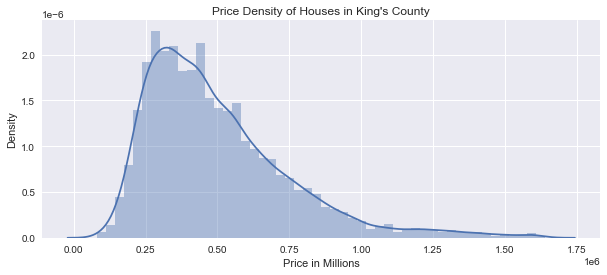

In [24]:
plt.figure(figsize=(10,4))

price_dist = sns.distplot(data["price"])
price_dist.set(xlabel="Price in Millions", title="Price Density of Houses in King's County")
plt.show()

The distribution is right skewed so we can try to make this more normalised by creating a log distribution

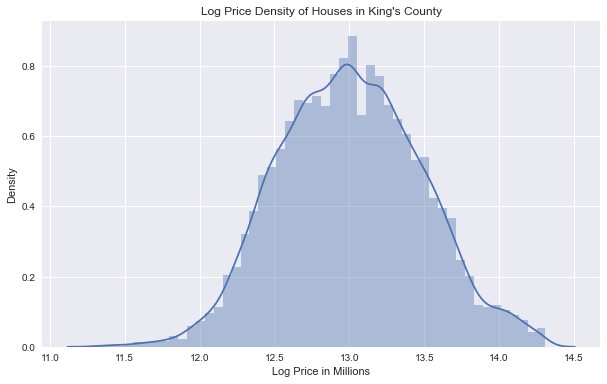

In [25]:
plt.figure(figsize=(10,6))

logged_price_dist = sns.distplot(np.log(data["price"]))
logged_price_dist.set(xlabel="Log Price in Millions", title="Log Price Density of Houses in King's County")
plt.show()

This looks a lot more normalised and making it much easier to work with later on.

In [26]:
#OLS squared data representative of the variables to predict
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'floors', 'grade', 'sqft_living', 'sqft_lot', 'yr_built']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     4274.
Date:                Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:10:38   Log-Likelihood:            -2.7556e+05
No. Observations:               20557   AIC:                         5.511e+05
Df Residuals:                   20549   BIC:                         5.512e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.065e+06   9.29e+04     65.284      0.000    5.88e+06    6.25e+06
bedrooms    -2.486e+04   1690.912    -14.701      0.000   -2.82e+04   -2.15e+04
bathrooms    4.156e+04   2710.446     15.335      0.000    3.63e+04    4.69e+04
floors        2.71e+04   2624.300     10.327      0.000     2.2e+04    3.22e+04
grade        1.202e+05   1685.042     71.361      0.000    1.17e+05    1.24e+05
sqft_living   118.7709      2.788     42.606      0.000     113.307     124.235
sqft_lot       -0.6948      0.087     -7.970      0.000      -0.866      -0.524
yr_built    -3424.6370     49.072    -69.788      0.000   -3520.823   -3328.451
==============================================================================
Omnibus:                     3411.446   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9511.457
Skew:                           0.893   Prob(JB):                         0.00
Kurtosis:                       5.813   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Correlation Visualisation

We want to view the dataset in a correlation matrix to see what data correlates with one another so we can use it to check for it's impact on the property prices.

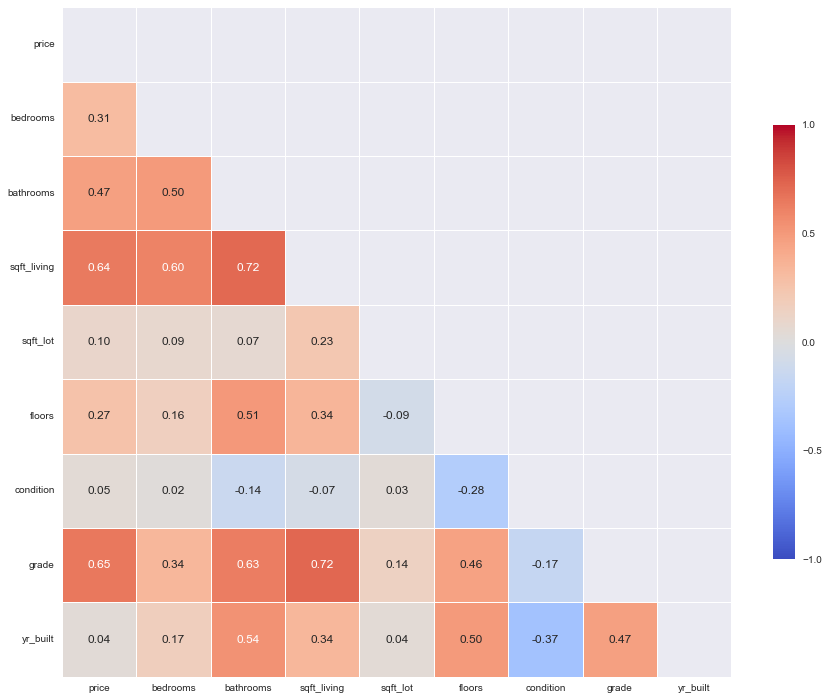

In [28]:
# Visulaise with a correlation matrix using heatmap
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, 
            mask=mask,
            square = True,
            linewidths = .5,
            cmap = "coolwarm",
            cbar_kws = {'shrink': .4, 
                    "ticks" : [-1, -.5, 0, 0.5, 1]},
            vmin = -1, 
            vmax = 1,
            annot = True,
            annot_kws = {"size": 12},
            fmt = ".2f")

ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)
plt.show()

Drop columns with low correlation based on values from the correlation matrix above and then do another check of the data to be used in a Histogram for visiual representation of data

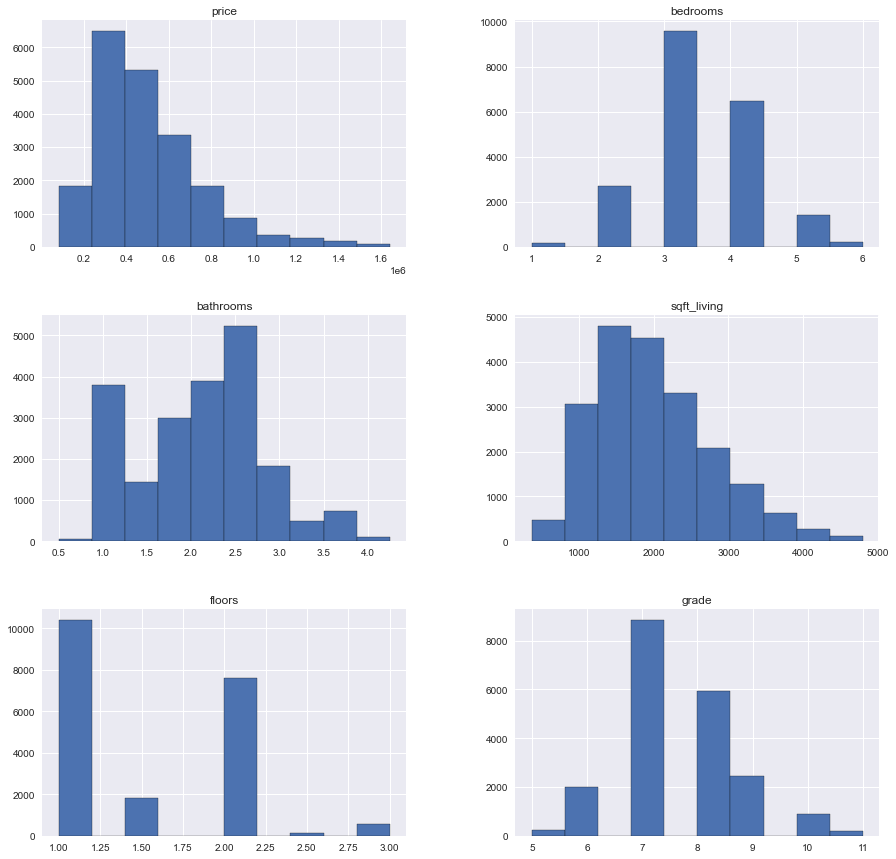

In [29]:
# Drop items with low correlation to price
data = data.drop(data[['sqft_lot', 'condition', 'yr_built']], axis=1)
data.hist(figsize=(15,15), edgecolor = 'black');

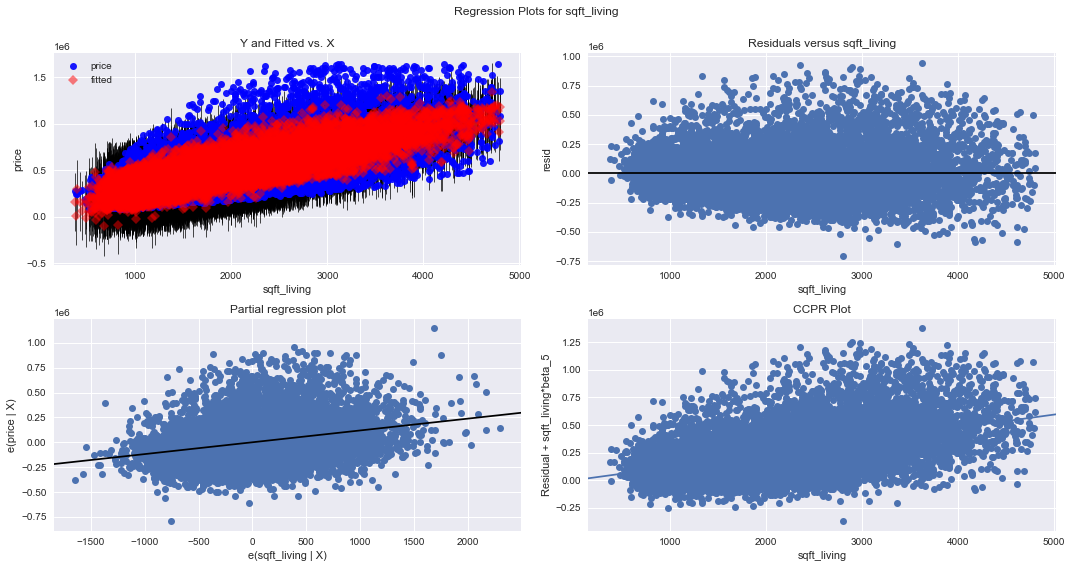

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

We can see from above that the data seems to be following the best line of fit and appears to be homodsacticity. 

This is ideal for our model.

# Linear Regression Checks

Now to do some linear regression checks on the model we will use.

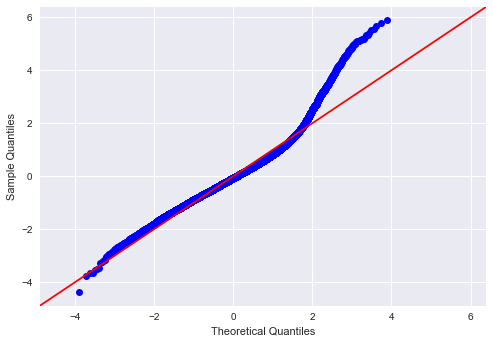

In [31]:
# Code for QQ-plot here
import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

The QQ plot above represents a mostly normalised distribution but still needs some adjustment and checks.

# Regression Analysis

Now baseline model is done we can move on to regression analysis

In [32]:
# Check data types of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20557 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        20557 non-null  float64
 1   bedrooms     20557 non-null  int64  
 2   bathrooms    20557 non-null  float64
 3   sqft_living  20557 non-null  int64  
 4   floors       20557 non-null  float64
 5   grade        20557 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.1 MB


In [33]:
# Change data types of categoricals to object so it can be used as prefix in next operation
data[['bedrooms', 'bathrooms', 'floors', 'grade']] = data[['bedrooms', 'bathrooms', 'floors', 'grade']].astype('object')
data.dtypes

price          float64
bedrooms        object
bathrooms       object
sqft_living      int64
floors          object
grade           object
dtype: object

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

continuous = ['price', 'sqft_living']
categoricals = ['bedrooms', 'bathrooms', 'floors', 'grade']

data_cont = data[continuous]

log_names = [f'{column}_log' for column in data_cont.columns]

data_log = np.log(data_cont)
data_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)

# one hot encode categoricals
data_ohe = pd.get_dummies(data[categoricals], drop_first=True)

preprocessed = pd.concat([data_log_norm, data_ohe], axis=1)

X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']

preprocessed.head()

,price_log,sqft_living_log,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,...,floors_1.5,floors_2.0,floors_2.5,floors_3.0,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11
0,-1.46,-1.13,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.39,0.83,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,-1.90,-2.21,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.64,0.15,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.28,-0.24,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


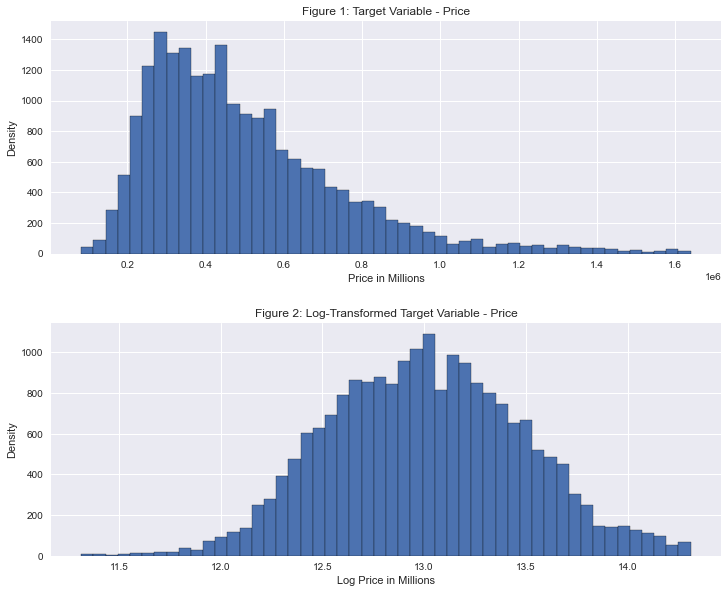

In [35]:
X_log = np.log(data['price'])
X_1 = data['price']

fig, ax = plt.subplots(2, 1, figsize=(10,8))
fig.tight_layout(h_pad=5)
grid = plt.GridSpec(2, 1, hspace=10)

ax[0].hist(X_1, bins=50, edgecolor = 'black')
ax[0].set(xlabel = "Price in Millions", ylabel = "Density")
ax[0].set_title("Figure 1: Target Variable - Price")
ax[1].hist(X_log, bins=50, edgecolor = 'black')
ax[1].set(xlabel = "Log Price in Millions", ylabel = "Density")
ax[1].set_title("Figure 2: Log-Transformed Target Variable - Price")
plt.show()

In [36]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(len(X_train), len(X_test), len(y_train), len(y_test))

14389 6168 14389 6168


In [37]:
# Apply and model the train-test set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

# Calculate Mean Square Error (MSE)
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.48507236281622856
Test Mean Squarred Error: 0.4707401929053488


We can see that the mean train and test MSE are very similar so we can conclude that our model will replicate results with relative accuracy.

In [38]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)
cv_5_results.mean()

0.48232954603903383

In [39]:
#OLS squared data representative of the variables to predict
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'grade', 'sqft_living']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     820.3
Date:                Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:10:41   Log-Likelihood:            -2.7727e+05
No. Observations:               20557   AIC:                         5.546e+05
Df Residuals:                   20529   BIC:                         5.548e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.161e+04   8.83e+04      0.245      0.807   -1.51e+05    1.95e+05
bedrooms[T.2]     -3756.4748    1.4e+04     -0.269      0.788   -3.11e+04    2.36e+04
bedrooms[T.3]     -5.271e+04   1.39e+04     -3.780      0.000      -8e+04   -2.54e+04
bedrooms[T.4]     -5.953e+04   1.42e+04     -4.183      0.000   -8.74e+04   -3.16e+04
bedrooms[T.5]     -5.572e+04    1.5e+04     -3.713      0.000   -8.51e+04   -2.63e+04
bedrooms[T.6]     -5.158e+04   1.88e+04     -2.740      0.006   -8.85e+04   -1.47e+04
bathrooms[T.0.75]  1.257e+05   9.03e+04      1.391      0.164   -5.14e+04    3.03e+05
bathrooms[T.1.0]   1.204e+05   8.74e+04      1.378      0.168   -5.09e+04    2.92e+05
bathrooms[T.1.25]  2.045e+05   1.05e+05      1.949      0.051   -1181.331     4.1e+05
bathrooms[T.1.5]   1.025e+05   8.75e+04      1.171      0.242    -6.9e+04    2.74e+05
bathrooms[T.1.75]  1.098e+05   8.75e+04      1.256      0.209   -6.16e+04    2.81e+05
bathrooms[T.2.0]   1.123e+05   8.75e+04      1.284      0.199   -5.92e+04    2.84e+05
bathrooms[T.2.25]  8.756e+04   8.75e+04      1.001      0.317    -8.4e+04    2.59e+05
bathrooms[T.2.5]   3.616e+04   8.75e+04      0.413      0.679   -1.35e+05    2.08e+05
bathrooms[T.2.75]  9.548e+04   8.76e+04      1.090      0.276   -7.62e+04    2.67e+05
bathrooms[T.3.0]   1.055e+05   8.77e+04      1.203      0.229   -6.64e+04    2.77e+05
bathrooms[T.3.25]  1.341e+05   8.78e+04      1.527      0.127    -3.8e+04    3.06e+05
bathrooms[T.3.5]   1.101e+05   8.78e+04      1.255      0.210   -6.19e+04    2.82e+05
bathrooms[T.3.75]  2.077e+05   8.91e+04      2.330      0.020    3.29e+04    3.82e+05
bathrooms[T.4.0]   1.391e+05   8.97e+04      1.551      0.121   -3.67e+04    3.15e+05
bathrooms[T.4.25]  1.953e+05   9.24e+04      2.113      0.035    1.41e+04    3.77e+05
grade[T.6]         4.111e+04   1.24e+04      3.320      0.001    1.68e+04    6.54e+04
grade[T.7]         1.111e+05   1.22e+04      9.111      0.000    8.72e+04    1.35e+05
grade[T.8]         2.073e+05   1.26e+04     16.513      0.000    1.83e+05    2.32e+05
grade[T.9]         3.382e+05   1.32e+04     25.628      0.000    3.12e+05    3.64e+05
grade[T.10]        4.412e+05   1.44e+04     30.635      0.000    4.13e+05    4.69e+05
grade[T.11]         5.37e+05   1.83e+04     29.274      0.000    5.01e+05    5.73e+05
sqft_living         129.6661      3.002     43.186      0.000     123.781     135.551
==============================================================================
Omnibus:                     3716.459   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9095.658
Skew:                           1.012   Prob(JB):                         0.00
Kurtosis:                       5.553   Cond. No.                     6.16e+05
======================

In [40]:
data = pd.get_dummies(data)

In [41]:
#Predicting data values 
data_preds = data.drop('price', axis=1)
data_target = data['price']
data_preds.head()

,sqft_living,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,...,floors_2.0,floors_2.5,floors_3.0,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11
0,1180,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2570,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,770,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1960,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1680,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [42]:
#use sm,add_constant() to add constant term/y-intercept
#optimise betas adding another predictor intercept term = bo x const
predictors = sm.add_constant(data_preds)
predictors

,const,sqft_living,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_0.5,bathrooms_0.75,...,floors_2.0,floors_2.5,floors_3.0,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11
0,1,1180,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,2570,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,1,770,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1960,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1680,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1,1530,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
21593,1,2310,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
21594,1,1020,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
21595,1,1600,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [43]:
#model target predictors 
model = sm.OLS(data_target, predictors).fit()
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     764.7
Date:                Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:10:41   Log-Likelihood:            -2.7690e+05
No. Observations:               20557   AIC:                         5.539e+05
Df Residuals:                   20525   BIC:                         5.541e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.442e+05   6956.782     35.107      0.000    2.31e+05    2.58e+05
sqft_living      128.4803      3.004     42.769      0.000     122.592     134.368
bedrooms_1      8.695e+04   1.17e+04      7.432      0.000     6.4e+04     1.1e+05
bedrooms_2      8.467e+04   4345.296     19.485      0.000    7.62e+04    9.32e+04
bedrooms_3      2.651e+04   3470.024      7.638      0.000    1.97e+04    3.33e+04
bedrooms_4      1.543e+04   3859.086      3.998      0.000    7863.242     2.3e+04
bedrooms_5      1.472e+04   5392.404      2.730      0.006    4153.752    2.53e+04
bedrooms_6      1.596e+04   1.08e+04      1.478      0.139   -5204.484    3.71e+04
bathrooms_0.5  -1.015e+05   8.08e+04     -1.255      0.209    -2.6e+05     5.7e+04
bathrooms_0.75  8438.8928   2.32e+04      0.364      0.716    -3.7e+04    5.39e+04
bathrooms_1.0  -3547.4950   7937.356     -0.447      0.655   -1.91e+04     1.2e+04
bathrooms_1.25  7.431e+04   5.41e+04      1.373      0.170   -3.18e+04     1.8e+05
bathrooms_1.5  -1.374e+04   8302.047     -1.655      0.098      -3e+04    2528.906
bathrooms_1.75 -3409.3310   7721.453     -0.442      0.659   -1.85e+04    1.17e+04
bathrooms_2.0  -3840.2906   7974.216     -0.482      0.630   -1.95e+04    1.18e+04
bathrooms_2.25 -9679.7114   7853.407     -1.233      0.218   -2.51e+04    5713.592
bathrooms_2.5  -4.952e+04   7378.368     -6.711      0.000    -6.4e+04   -3.51e+04
bathrooms_2.75 -4711.2017   8482.701     -0.555      0.579   -2.13e+04    1.19e+04
bathrooms_3.0   5612.6184   9315.025      0.603      0.547   -1.26e+04    2.39e+04
bathrooms_3.25  4.309e+04   1.02e+04      4.216      0.000    2.31e+04    6.31e+04
bathrooms_3.5   2.673e+04   9767.554      2.736      0.006    7582.979    4.59e+04
bathrooms_3.75  1.131e+05   1.72e+04      6.565      0.000    7.93e+04    1.47e+05
bathrooms_4.0    4.94e+04   1.95e+04      2.527      0.012    1.11e+04    8.77e+04
bathrooms_4.25  1.135e+05   2.84e+04      4.001      0.000    5.79e+04    1.69e+05
floors_1.0      1.641e+04   3935.925      4.169      0.000    8693.443    2.41e+04
floors_1.5      1.115e+05   5007.415     22.259      0.000    1.02e+05    1.21e+05
floors_2.0     -1.974e+04   3913.219     -5.045      0.000   -2.74e+04   -1.21e+04
floors_2.5      9.705e+04    1.3e+04      7.473      0.000    7.16e+04    1.22e+05
floors_3.0      3.906e+04   6719.741      5.812      0.000    2.59e+04    5.22e+04
grade_5        -2.147e+05   1.07e+04    -20.111      0.000   -2.36e+05   -1.94e+05
grade_6        -1.716e+05   4885.011    -35.128      0.000   -1.81e+05   -1.62e+05
grade_7        -9.829e+04   3355.427    -29.293      0.000   -1.05e+05   -9.17e+04
grade_8          428.1811   3396.700      0.126      0.900   -6229.621    7085.983
grade_9         1.399e+05   4401.638     31.786      0.000    1.31e+05    1.49e+05
grade_10    

In [44]:
data_preds_scaled = (data_preds - np.mean(data_preds))/np.std(data_preds)

In [45]:
data_preds_scaled.describe()

,sqft_living,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,...,floors_2.0,floors_2.5,floors_3.0,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11
count,20557,20557,20557,20557,20557,20557,20557,20557,20557,20557,...,20557,20557,20557,20557,20557,20557,20557,20557,20557,20557
mean,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,...,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.09,-0.09,-0.39,-0.93,-0.68,-0.27,-0.10,-0.01,-0.05,-0.48,...,-0.77,-0.08,-0.17,-0.11,-0.33,-0.87,-0.64,-0.37,-0.21,-0.10
25%,-0.75,-0.09,-0.39,-0.93,-0.68,-0.27,-0.10,-0.01,-0.05,-0.48,...,-0.77,-0.08,-0.17,-0.11,-0.33,-0.87,-0.64,-0.37,-0.21,-0.10
50%,-0.16,-0.09,-0.39,-0.93,-0.68,-0.27,-0.10,-0.01,-0.05,-0.48,...,-0.77,-0.08,-0.17,-0.11,-0.33,-0.87,-0.64,-0.37,-0.21,-0.10
75%,0.61,-0.09,-0.39,1.07,1.47,-0.27,-0.10,-0.01,-0.05,-0.48,...,1.30,-0.08,-0.17,-0.11,-0.33,1.15,1.57,-0.37,-0.21,-0.10
max,3.61,10.79,2.57,1.07,1.47,3.68,9.89,71.68,19.13,2.10,...,1.30,12.89,5.83,9.48,3.04,1.15,1.57,2.72,4.67,9.89


In [46]:
predictors = sm.add_constant(data_preds_scaled)
model = sm.OLS(data_target, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     764.7
Date:                Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:10:41   Log-Likelihood:            -2.7690e+05
No. Observations:               20557   AIC:                         5.539e+05
Df Residuals:                   20525   BIC:                         5.541e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.999e+05   1195.544    418.106      0.000    4.98e+05    5.02e+05
sqft_living      9.99e+04   2335.718     42.769      0.000    9.53e+04    1.04e+05
bedrooms_1      5013.0428   1240.264      4.042      0.000    2582.028    7444.058
bedrooms_2      1.765e+04   1181.490     14.941      0.000    1.53e+04       2e+04
bedrooms_3     -2930.6253    804.211     -3.644      0.000   -4506.943   -1354.308
bedrooms_4     -7881.2802    931.287     -8.463      0.000   -9706.678   -6055.883
bedrooms_5     -4467.4573   1185.467     -3.769      0.000   -6791.067   -2143.847
bedrooms_6     -1643.5855   1207.496     -1.361      0.173   -4010.374     723.203
bathrooms_0.5  -1256.4395   1197.238     -1.049      0.294   -3603.121    1090.242
bathrooms_0.75  1032.5749   1228.199      0.841      0.401   -1374.794    3439.944
bathrooms_1.0   3033.8159   1427.796      2.125      0.034     235.223    5832.409
bathrooms_1.25  1792.3713   1197.751      1.496      0.135    -555.316    4140.059
bathrooms_1.5   -603.0565   1150.966     -0.524      0.600   -2859.041    1652.928
bathrooms_1.75  2808.7528   1106.484      2.538      0.011     639.955    4977.550
bathrooms_2.0   2175.1243   1111.034      1.958      0.050      -2.591    4352.839
bathrooms_2.25   501.5685   1101.858      0.455      0.649   -1658.160    2661.297
bathrooms_2.5  -1.662e+04   1164.280    -14.273      0.000   -1.89e+04   -1.43e+04
bathrooms_2.75  1519.9808   1181.858      1.286      0.198    -796.554    3836.516
bathrooms_3.0   3050.4435   1196.745      2.549      0.011     704.728    5396.159
bathrooms_3.25  8299.7966   1239.572      6.696      0.000    5870.138    1.07e+04
bathrooms_3.5   6526.3172   1283.653      5.084      0.000    4010.256    9042.379
bathrooms_3.75  8994.7471   1223.105      7.354      0.000    6597.364    1.14e+04
bathrooms_4.0   3783.9030   1219.675      3.102      0.002    1393.244    6174.562
bathrooms_4.25  5147.8318   1211.526      4.249      0.000    2773.144    7522.520
floors_1.0      -313.2835    861.141     -0.364      0.716   -2001.188    1374.621
floors_1.5      2.688e+04   1093.599     24.576      0.000    2.47e+04     2.9e+04
floors_2.0     -1.776e+04    962.685    -18.454      0.000   -1.97e+04   -1.59e+04
floors_2.5      6170.4815   1190.666      5.182      0.000    3836.682    8504.281
floors_3.0      3670.8586   1200.469      3.058      0.002    1317.844    6023.873
grade_5        -2.046e+04   1237.492    -16.537      0.000   -2.29e+04    -1.8e+04
grade_6        -4.545e+04   1295.603    -35.076      0.000    -4.8e+04   -4.29e+04
grade_7        -3.952e+04    953.655    -41.445      0.000   -4.14e+04   -3.77e+04
grade_8         8556.8209    929.536      9.205      0.000    6734.857    1.04e+04
grade_9         5.125e+04   1212.774     42.257      0.000    4.89e+04    5.36e+04
grade_10    

In [47]:
#Transforming dataset 
ss = StandardScaler()
ss.fit(data_preds)
data_preds_st_scaled = ss.transform(data_preds_scaled)
data_preds_scaled.head()

,sqft_living,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,...,floors_2.0,floors_2.5,floors_3.0,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11
0,-1.05,-0.09,-0.39,1.07,-0.68,-0.27,-0.10,-0.01,-0.05,2.10,...,-0.77,-0.08,-0.17,-0.11,-0.33,1.15,-0.64,-0.37,-0.21,-0.10
1,0.74,-0.09,-0.39,1.07,-0.68,-0.27,-0.10,-0.01,-0.05,-0.48,...,1.30,-0.08,-0.17,-0.11,-0.33,1.15,-0.64,-0.37,-0.21,-0.10
2,-1.58,-0.09,2.57,-0.93,-0.68,-0.27,-0.10,-0.01,-0.05,2.10,...,-0.77,-0.08,-0.17,-0.11,3.04,-0.87,-0.64,-0.37,-0.21,-0.10
3,-0.05,-0.09,-0.39,-0.93,1.47,-0.27,-0.10,-0.01,-0.05,-0.48,...,-0.77,-0.08,-0.17,-0.11,-0.33,1.15,-0.64,-0.37,-0.21,-0.10
4,-0.41,-0.09,-0.39,1.07,-0.68,-0.27,-0.10,-0.01,-0.05,-0.48,...,-0.77,-0.08,-0.17,-0.11,-0.33,-0.87,1.57,-0.37,-0.21,-0.10


In [48]:
#boolean value declared
np.allclose(data_preds_st_scaled, data_preds_scaled)

False

In [49]:
#obtaining statistic values of target mean
data_target.mean()

499864.60573040816

In [50]:
#created array 
data_preds_st_scaled[:5, :]

array([[-2.56800949, -1.10124672, -1.53960511,  1.21477732, -2.14132247,
        -1.34548719, -1.11132372, -1.0141452 , -1.05499604,  4.95008312,
        -1.02136642, -1.3478745 , -1.58335458, -1.41913999, -1.43621927,
        -1.92618725, -1.29984574, -1.22032545, -1.18046696, -1.2078406 ,
        -1.07795489, -1.0664114 , -1.04300303,  0.96647474, -1.41001687,
        -2.35728859, -1.08360404, -1.20104296, -1.11654861, -1.43697218,
         1.45650708, -2.04213644, -1.50211192, -1.26029233, -1.11132372],
       [-2.56571026, -1.10124672, -1.53960511,  1.21477732, -2.14132247,
        -1.34548719, -1.11132372, -1.0141452 , -1.05499604, -1.70132507,
        -1.02136642, -1.3478745 , -1.58335458, -1.41913999,  9.94497979,
        -1.92618725, -1.29984574, -1.22032545, -1.18046696, -1.2078406 ,
        -1.07795489, -1.0664114 , -1.04300303, -3.03403041, -1.41001687,
         1.92856476, -1.08360404, -1.20104296, -1.11654861, -1.43697218,
         1.45650708, -2.04213644, -1.50211192, -1.

# Model fit in Linear Regression

In [51]:
#confirm mlr to run
mlr = LinearRegression()
mlr.fit(data_preds_st_scaled, data_target)

LinearRegression()

In [52]:
#setting co-efficient array 
mlr.coef_

array([ 7.76728249e+07,  4.97189351e+02,  6.45453728e+03, -3.81980866e+02,
       -2.72589326e+03, -8.52476673e+02, -1.21019810e+02, -1.57099614e+01,
        7.91613843e+01,  2.57874503e+03,  4.15771448e+01,  4.49636466e+02,
        2.15148002e+03,  1.40620298e+03,  9.68269631e+02, -5.46943082e+03,
        8.32643274e+02,  8.48759829e+02,  1.48138888e+03,  1.39162251e+03,
        6.98993959e+02,  2.71750505e+02,  2.28085447e+02,  2.66238317e+03,
        8.56366294e+03, -5.94980796e+03,  5.42943813e+02,  9.25239567e+02,
       -1.87095055e+03, -1.13566117e+04, -1.36414246e+04,  8.83937539e+03,
        1.91158768e+04,  1.21285343e+04,  3.85585135e+03])

In [53]:
#calculating intercept data value 
mlr.intercept_

199861302.02220723

In [54]:
#calculating linear regression score 
mlr.score(data_preds_st_scaled, data_target)

0.535957678792979

In [55]:
#validating though y^test
y_hat = mlr.predict(data_preds_st_scaled)
y_hat

array([336910.0705739 , 473214.56316549, 269085.01388445, ...,
       350350.77072418, 407472.82492727, 350350.77072418])

In [56]:
#find values for array 
data_preds_st_scaled.shape

(20557, 35)

In [57]:
#staged array
base_pred = np.zeros(35).reshape(1, -1)
base_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]])

In [58]:
#predicted array
mlr.predict(base_pred)

array([1.99861302e+08])

In [59]:
#overall metrics predicted data target metric to be .619 or 62%
metrics.r2_score(data_target, mlr.predict(data_preds_st_scaled))

0.535957678792979

In [60]:
#setting predictors location  
data_pred = data.iloc[:,0:12]
data_pred.head()

,price,sqft_living,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25
0,221900,1180,0,0,1,0,0,0,0,0,1,0
1,538000,2570,0,0,1,0,0,0,0,0,0,0
2,180000,770,0,1,0,0,0,0,0,0,1,0
3,604000,1960,0,0,0,1,0,0,0,0,0,0
4,510000,1680,0,0,1,0,0,0,0,0,0,0


In [61]:
#visualse value of correlation percentage 
data_pred.corr()

,price,sqft_living,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25
price,1,0.64,-0.06,-0.16,-0.18,0.22,0.16,0.05,-0.01,-0.04,-0.29,0.01
sqft_living,0.64,1,-0.13,-0.38,-0.26,0.40,0.28,0.11,-0.01,-0.07,-0.50,-0.01
bedrooms_1,-0.06,-0.13,1,-0.04,-0.09,-0.06,-0.03,-0.01,0.04,0.19,0.13,0.05
bedrooms_2,-0.16,-0.38,-0.04,1,-0.36,-0.26,-0.11,-0.04,0.02,0.03,0.38,0.01
bedrooms_3,-0.18,-0.26,-0.09,-0.36,1,-0.63,-0.25,-0.09,-0.01,-0.02,0.00,-0.00
bedrooms_4,0.22,0.40,-0.06,-0.26,-0.63,1,-0.18,-0.07,-0.00,-0.03,-0.24,-0.01
bedrooms_5,0.16,0.28,-0.03,-0.11,-0.25,-0.18,1,-0.03,-0.00,-0.01,-0.11,-0.01
bedrooms_6,0.05,0.11,-0.01,-0.04,-0.09,-0.07,-0.03,1,-0.00,-0.01,-0.04,-0.00
bathrooms_0.5,-0.01,-0.01,0.04,0.02,-0.01,-0.00,-0.00,-0.00,1,-0.00,-0.01,-0.00
bathrooms_0.75,-0.04,-0.07,0.19,0.03,-0.02,-0.03,-0.01,-0.01,-0.00,1,-0.02,-0.00


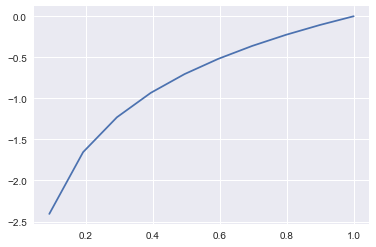

In [62]:
#Log trandsformation visual representation 
x = np.linspace(start=-100, stop=1, num=10**3)
y = np.log(x)
plt.plot(x, y);

We can see that the mean train and test MSE are very similar so we can conclude that our model will replicate results with relative accuracy.

# Conclusion

We can reject the null hypothesis that there's no relationship between house prices and other factors such as the size of living area, bedrooms, bathrooms, etc. These factors do in fact have an effect on the price of a property.
It appears that bigger is better, with more living area, more bedrooms and bathrooms typically reflected in a higher sale price of the properties.